In [7]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/drive/MyDrive/senior_thesis/part_2/thetas2.csv')

In [10]:
data.head()

,Unnamed: 0,Model,IFEval,Big_Bench_Hard,MuSR,Theta
0,0,gemma-1.1-2b-it,30.67,5.86,2.02,0.383102
1,1,gemma-2-2b-it,56.68,17.98,7.08,0.939241
2,2,gemma-2b,26.90,5.21,3.03,0.268018
3,3,gemma-7b,26.59,21.12,10.98,-0.215110
4,4,gpt2-large,20.48,3.25,5.66,-1.074392


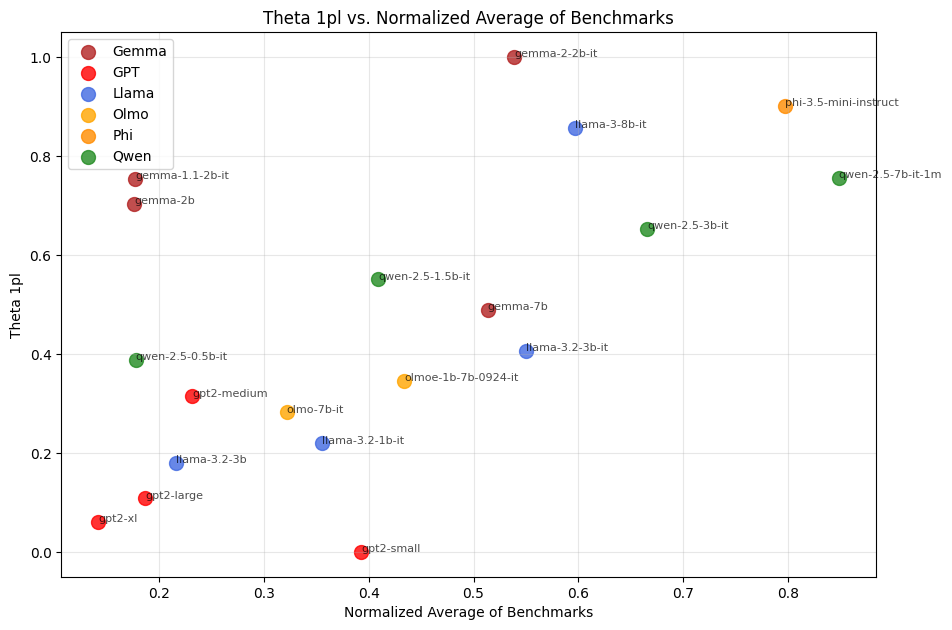

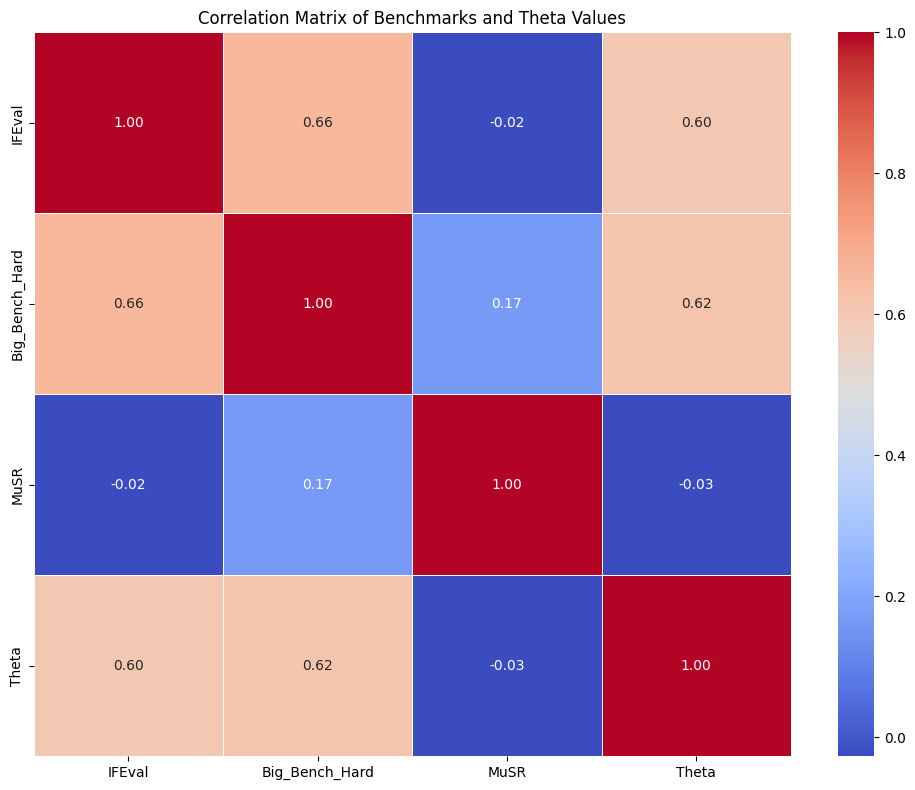

Correlation Analysis:

Theta correlations:
  with IFEval: r = 0.5998, p-value = 0.0066
  with Big_Bench_Hard: r = 0.6160, p-value = 0.0050
  with MuSR: r = -0.0265, p-value = 0.9142
  with Avg_Norm_Benchmark: r = 0.5776, p-value = 0.0096


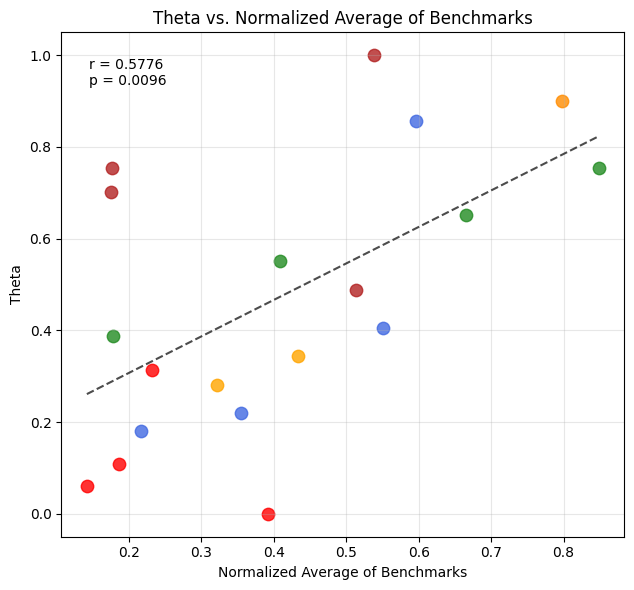


Summary Table:
                Model  IFEval  Big_Bench_Hard  MuSR  Avg_Norm_Benchmark    Theta
    qwen-2.5-7b-it-1m   74.48           35.03  9.52            0.848361 0.754825
phi-3.5-mini-instruct   57.75           36.75 10.10            0.797240 0.901335
       qwen-2.5-3b-it   64.75           25.80  7.57            0.665921 0.651835
        llama-3-8b-it   74.08           28.24  1.60            0.596973 0.857018
      llama-3.2-3b-it   73.93           24.06  1.37            0.550147 0.406022
        gemma-2-2b-it   56.68           17.98  7.08            0.539077 1.000000
             gemma-7b   26.59           21.12 10.98            0.513670 0.488815
  olmoe-1b-7b-0924-it   46.67           14.57  6.07            0.433795 0.344866
     qwen-2.5-1.5b-it   44.76           19.81  3.19            0.409008 0.550830
           gpt2-small   17.93            2.67 15.35            0.392683 0.000000
      llama-3.2-1b-it   56.98            8.74  2.97            0.355324 0.219626
           o

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data)

# Calculate the normalized average of benchmarks (IFEval, Big_Bench_Hard, MuSR)
# First, normalize each benchmark column independently
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df['IFEval_norm'] = min_max_normalize(df['IFEval'])
df['Big_Bench_Hard_norm'] = min_max_normalize(df['Big_Bench_Hard'])
df['MuSR_norm'] = min_max_normalize(df['MuSR'])

# Calculate the average of normalized benchmarks
df['Avg_Norm_Benchmark'] = (df['IFEval_norm'] + df['Big_Bench_Hard_norm'] + df['MuSR_norm']) / 3

# Normalize the theta columns as well (optional, but helps for visualization)
# df['Theta_GRM_norm'] = min_max_normalize(df['Theta_GRM'])
# df['Theta_2pl_norm'] = min_max_normalize(df['Theta_2pl'])
# df['Theta_1pl_norm'] = min_max_normalize(df['Theta_1pl'])
df['Theta'] = min_max_normalize(df['Theta'])

# Create a plot with multiple subplots for each theta vs the average benchmark
plt.figure(figsize=(18, 12))

# Setup a color palette based on model families
def get_model_family(model_name):
    if 'llama' in model_name.lower():
        return 'Llama'
    elif 'qwen' in model_name.lower():
        return 'Qwen'
    elif 'gemma' in model_name.lower():
        return 'Gemma'
    elif 'phi' in model_name.lower():
        return 'Phi'
    elif 'flan' in model_name.lower():
        return 'Flan'
    elif 'gpt' in model_name.lower():
        return 'GPT'
    elif 'mistral' in model_name.lower():
        return 'Mistral'
    elif 'flan' in model_name.lower():
        return 'Flan'
    elif 'olmo' in model_name.lower():
        return 'Olmo'
    else:
        return 'Other'

df['Model_Family'] = df['Model'].apply(get_model_family)
family_colors = {'Llama': 'royalblue', 'Qwen': 'forestgreen', 'Gemma': 'firebrick',
                 'Phi': 'darkorange', 'Flan': 'purple', 'GPT': 'red', 'Olmo':'orange',
                 'Mistral':'green', 'Other': 'gray'}

# # Subplot 1: Theta GRM vs Average Benchmark
# plt.subplot(2, 2, 1)
# for family in df['Model_Family'].unique():
#     family_df = df[df['Model_Family'] == family]
#     plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta_GRM'],
#                 label=family, color=family_colors[family], s=100, alpha=0.8)

# for i, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta_GRM']),
#                 fontsize=8, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta GRM')
# plt.title('Theta GRM vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

# # Subplot 2: Theta 2pl vs Average Benchmark
# plt.subplot(2, 2, 2)
# for family in df['Model_Family'].unique():
#     family_df = df[df['Model_Family'] == family]
#     plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta_2pl'],
#                 label=family, color=family_colors[family], s=100, alpha=0.8)

# for i, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta_2pl']),
#                 fontsize=8, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta 2pl')
# plt.title('Theta 2pl vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

# Subplot 3: Theta 1pl vs Average Benchmark
plt.subplot(2, 2, 3)
for family in df['Model_Family'].unique():
    family_df = df[df['Model_Family'] == family]
    plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta'],
                label=family, color=family_colors[family], s=100, alpha=0.8)

for i, row in df.iterrows():
    plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta']),
                fontsize=8, alpha=0.7)

plt.xlabel('Normalized Average of Benchmarks')
plt.ylabel('Theta 1pl')
plt.title('Theta 1pl vs. Normalized Average of Benchmarks')
plt.grid(True, alpha=0.3)
plt.legend()

# # Subplot 4: All Thetas vs Average Benchmark (combined view)
# plt.subplot(2, 2, 4)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_GRM'], label='Theta GRM', marker='o', s=80, alpha=0.7)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_2pl'], label='Theta 2pl', marker='^', s=80, alpha=0.7)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_1pl'], label='Theta 1pl', marker='s', s=80, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta Values')
# plt.title('All Theta Values vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

plt.tight_layout()
plt.savefig('model_thetas_vs_benchmarks.png', dpi=300)
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_columns = ['IFEval', 'Big_Bench_Hard', 'MuSR', 'Theta']
correlation_matrix = df[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Benchmarks and Theta Values')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# Let's also look at the numerical relationship by calculating linear regression
from scipy import stats

# Print correlation coefficients and p-values
print("Correlation Analysis:")
for theta in ['Theta']:
    print(f"\n{theta} correlations:")
    for benchmark in ['IFEval', 'Big_Bench_Hard', 'MuSR', 'Avg_Norm_Benchmark']:
        corr, p_value = stats.pearsonr(df[benchmark], df[theta])
        print(f"  with {benchmark}: r = {corr:.4f}, p-value = {p_value:.4f}")

# Scatterplot with regression line for each theta vs the average benchmark
plt.figure(figsize=(18, 6))

thetas = ['Theta']
# thetas = ['Theta_GRM', 'Theta_2pl', 'Theta_1pl']
for i, theta in enumerate(thetas, 1):
    plt.subplot(1, 3, i)

    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Avg_Norm_Benchmark'], df[theta])
    x = np.linspace(df['Avg_Norm_Benchmark'].min(), df['Avg_Norm_Benchmark'].max(), 100)
    y = slope * x + intercept

    # Plot points by model family
    for family in df['Model_Family'].unique():
        family_df = df[df['Model_Family'] == family]
        plt.scatter(family_df['Avg_Norm_Benchmark'], family_df[theta],
                   label=family, color=family_colors[family], s=80, alpha=0.8)

    plt.plot(x, y, 'k--', alpha=0.7)
    plt.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.xlabel('Normalized Average of Benchmarks')
    plt.ylabel(theta)
    plt.title(f'{theta} vs. Normalized Average of Benchmarks')
    plt.grid(True, alpha=0.3)

    if i == 3:  # Only show legend for the last plot to save space
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('regression_analysis.png', dpi=300)
plt.show()

# Print the summary table
print("\nSummary Table:")
summary_df = df[['Model', 'IFEval', 'Big_Bench_Hard', 'MuSR', 'Avg_Norm_Benchmark',
                 'Theta']].copy()
summary_df = summary_df.sort_values('Avg_Norm_Benchmark', ascending=False)
print(summary_df.to_string(index=False))

#meow


In [ ]:
def prepare_grm_data(llm_dataframes, ground_truth_df):
    """
    Prepares data for graded response IRT analysis by comparing student
    grades to ground truth across multiple rubric categories.
    """
    categories = ['overall', 'cohesion', 'syntax', 'vocabulary', 'phraseology',
                 'grammar', 'conventions']

    category_dataframes = {}

    for category in categories:
        category_data = pd.DataFrame(index=ground_truth_df.index)
        category_data['essay_id'] = ground_truth_df['text_id_kaggle']
        category_data['ground_truth'] = ground_truth_df[category]


        for name, df in llm_dataframes.items():
            aligned_responses = []

            for id in ground_truth_df['text_id_kaggle']:
                try:
                    # Get ground truth grade
                    true_grade = ground_truth_df.loc[ground_truth_df['text_id_kaggle'] == id, category].values[0]

                    # Get LLM grade with better numeric handling
                    llm_grade = df.loc[df['essay_id'] == id, category].values[0]

                    # Convert to float first to handle decimals
                    try:
                        llm_grade = float(llm_grade)
                        # # If you need integers, round it
                        # if category in ['overall']:  # Add categories that should be integers
                        #     llm_grade = round(llm_grade)
                    except (ValueError, TypeError):
                        print(f"Warning: Invalid grade value '{llm_grade}' for {id}, defaulting to 3")
                        llm_grade = 3

                    response = llm_grade
                    aligned_responses.append(response)

                except IndexError:
                    print(f"Warning: Missing data for essay_id {id}, defaulting to middle response")
                    aligned_responses.append(3)  # or whatever your middle response value should be
                except Exception as e:
                    print(f"Error processing essay {id}: {e}")
                    aligned_responses.append(3)

            category_data[name] = aligned_responses

        category_dataframes[category] = category_data

    return category_dataframes

In [ ]:
import glob
path = '/content/drive/MyDrive/senior_thesis/final_outputs'
csv_files = [file for file in glob.glob(f'{path}/*.csv')]


## we also want to get a list of common ids in case of nans, etc etc-- and to take it out of the ground truth set

common_ids = pd.DataFrame(columns=['essay_id'])
llm_dfs ={}
for file in csv_files:
    df = pd.read_csv(file)
    df.dropna(inplace=True)
    if common_ids.empty:
        common_ids['essay_id'] = df['essay_id']
    else:
      common_ids = pd.merge(common_ids, df['essay_id'], on=['essay_id'], how='inner')
    file_name = file.split('/')[-1]
    file_name = file_name[:-4]
    llm_dfs[file_name] = df.copy()

In [ ]:
ground_truth_full= pd.read_csv("/content/drive/MyDrive/senior_thesis/ellipse_dataset.csv")
ground_truth = ground_truth_full.merge(common_ids, left_on='text_id_kaggle', right_on='essay_id')
ground_truth = ground_truth[['text_id_kaggle','Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions']]
ground_truth = ground_truth.rename(columns={'Overall': 'overall', 'Cohesion': 'cohesion', 'Syntax': 'syntax', 'Vocabulary':'vocabulary', 'Phraseology':'phraseology', 'Grammar':'grammar', 'Conventions':'conventions'})

ground_truth.head()

In [ ]:
category_data = prepare_grm_data(llm_dfs, ground_truth)

In [ ]:
category_data['overall']

In [ ]:
model_names = list(llm_dfs.keys())
model_names

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for ground truth
x = np.linspace(df[['ground_truth'] + model_names].min().min() - 0.5,
                df[['ground_truth'] + model_names].max().max() + 0.5,
                1000)

# Create KDE for ground truth with thicker line
ground_truth_kde = stats.gaussian_kde(df['ground_truth'])
plt.plot(x, ground_truth_kde(x), 'k-', linewidth=3, label='Ground Truth')

# Create KDEs for each model
colors = sns.color_palette("Set2", len(model_names))
for i, model in enumerate(model_names):
    model_kde = stats.gaussian_kde(df[model])
    plt.plot(x, model_kde(x), linewidth=2, color=colors[i], label=model)

    # Add small vertical lines at the means
    plt.axvline(df[model].mean(), color=colors[i], linestyle='--', alpha=0.6)

# Add vertical line for ground truth mean
plt.axvline(df['ground_truth'].mean(), color='black', linestyle='--', alpha=0.6)

# Add legend, labels and title
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution Comparison: Models vs Ground Truth', fontsize=16)
plt.grid(True, alpha=0.3)

# Optional: Add annotation for means in legend
handles, labels = plt.gca().get_legend_handles_labels()
for i, model in enumerate(['ground_truth'] + model_names):
    model_display = 'Ground Truth' if model == 'ground_truth' else model
    labels[i] = f"{model_display} (mean={df[model].mean():.2f})"
plt.legend(handles, labels, fontsize=10, loc='upper left')

plt.tight_layout()

# Show the plot
plt.savefig('model_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Statistical summary
print("Statistical Summary:")
summary = pd.DataFrame({
    'Mean': [df[model].mean() for model in ['ground_truth'] + model_names],
    'Std': [df[model].std() for model in ['ground_truth'] + model_names],
    'Median': [df[model].median() for model in ['ground_truth'] + model_names],
    'Min': [df[model].min() for model in ['ground_truth'] + model_names],
    'Max': [df[model].max() for model in ['ground_truth'] + model_names]
})
summary.index = ['Ground Truth'] + model_names
print(summary)

# Calculate KL divergence to measure distribution differences
print("\nKL Divergence from Ground Truth:")
kl_divs = {}
bins = np.linspace(df[['ground_truth'] + model_names].min().min(),
                  df[['ground_truth'] + model_names].max().max(),
                  50)

for model in model_names:
    # Calculate histograms
    hist_gt, _ = np.histogram(df['ground_truth'], bins=bins, density=True)
    hist_model, _ = np.histogram(df[model], bins=bins, density=True)

    # Add small epsilon to avoid division by zero
    hist_gt = hist_gt + 1e-10
    hist_model = hist_model + 1e-10

    # Normalize
    hist_gt = hist_gt / np.sum(hist_gt)
    hist_model = hist_model / np.sum(hist_model)

    # Calculate KL divergence
    kl_div = np.sum(hist_gt * np.log(hist_gt / hist_model))
    kl_divs[model] = kl_div

for model, kl in kl_divs.items():
    print(f"{model}: {kl:.4f} (lower is better)")